# 0.) Import and Clean data

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [73]:
df = pd.read_csv("C:\\Users\\HP Pavilion 13\\ML Lab\\Week 8\\bank-additional-full.csv", sep = ";")
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [74]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [75]:
df = df.drop(["default", "pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], axis = 1)

In [76]:
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [77]:
df

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,yes,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
41184,46,383,no,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,no,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
41186,44,442,yes,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [78]:
y = pd.get_dummies(df["y"], drop_first = True)

In [79]:
X = df.drop(["y"], axis = 1)

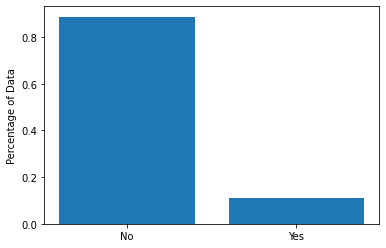

In [80]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [81]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
X_test.describe()

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
count,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,...,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000
mean,40.054058,259.241321,0.022336,0.150846,0.222870,0.037873,0.024763,0.073642,0.043700,0.032775,...,0.099215,0.015538,0.014243,0.055434,0.151979,0.226349,0.000566,0.129077,0.294408,0.040058
std,10.353918,257.095608,0.147778,0.357913,0.416188,0.190897,0.155409,0.261199,0.204435,0.178054,...,0.298963,0.123683,0.118496,0.228835,0.359015,0.418485,0.023795,0.335298,0.455795,0.196104
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,322.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,94.000000,3509.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
len(X_scaled)

28831

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [91]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)

X_scaled, y_train = smote.fit_resample(X_train, y_train)

In [92]:
len(X_scaled)

51160

In [93]:
len(y_train)

51160

In [94]:
# Checking class distributions after transforming the data
from collections import Counter
print(sorted(Counter(y_train).items()))

[('yes', 1)]


# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [95]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.5\ngini = 0.375\nsamples = 24040\nvalue = [18034, 6006]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 133.5\ngini = 0.452\nsamples = 16964\nvalue = [11100, 5864]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.278\nsamples = 7650\nvalue = [6376, 1274]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9314\nvalue = [4724, 4590]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 0.5\ngini = 0.039\nsamples = 7076\nvalue = [6934, 142]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.031\nsamples = 6991\nvalue = [6881, 110]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 85\nvalue = [53, 32]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.402\nsamples = 27120\nvalue = [7546, 19574]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.5\ngini = 0.316\nsamples = 22973\nvalue = [4520, 18453]\nclass = Yes'),
 Te

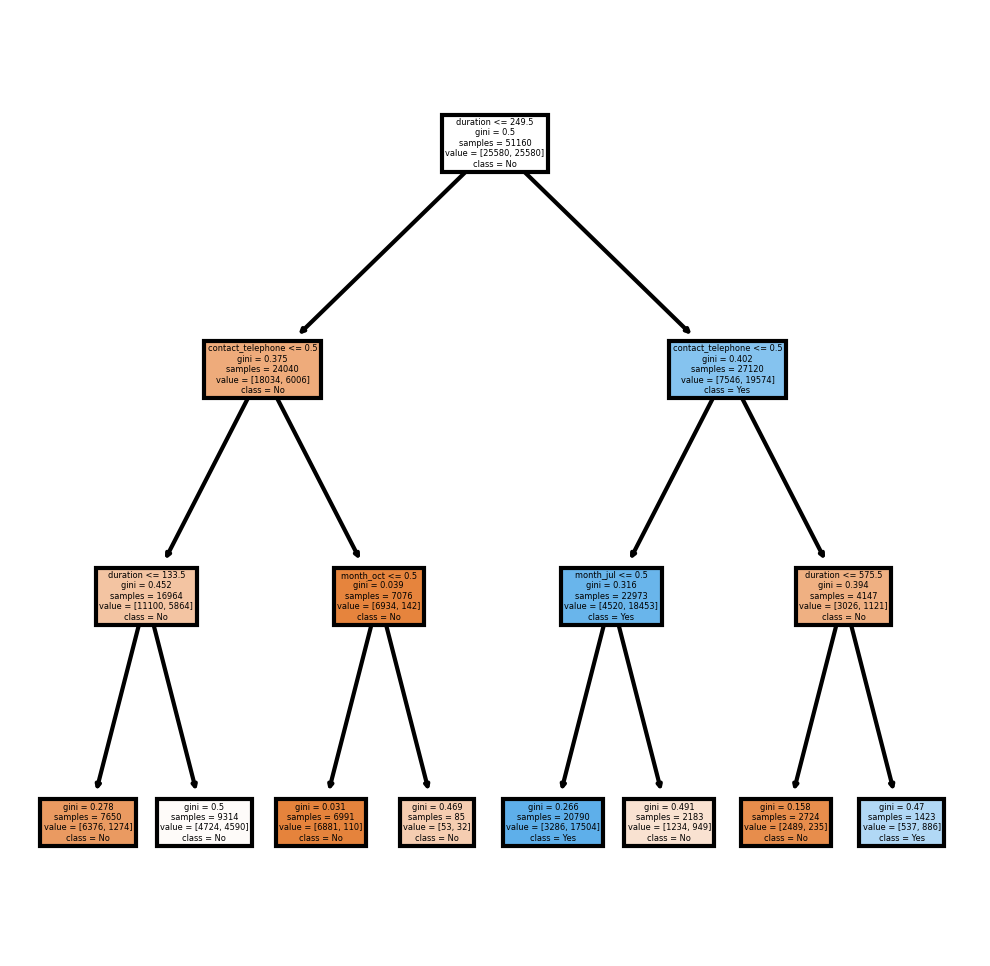

In [96]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [97]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

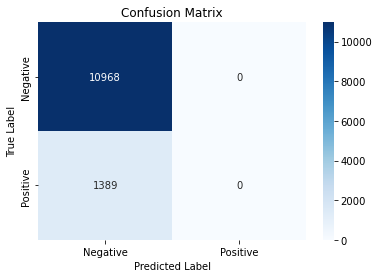

In [98]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [119]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [120]:
bagging = BaggingClassifier(base_estimator = dtree,
                          n_estimators = 100,
                          max_samples = 0.5,
                          max_features = 1)

In [121]:
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)

In [122]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

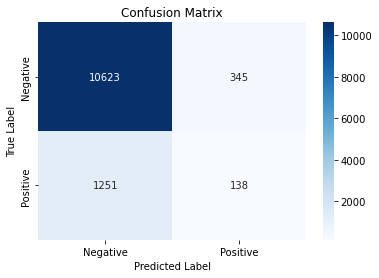

In [123]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [124]:
from sklearn.ensemble import AdaBoostClassifier

In [125]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [127]:
boost = AdaBoostClassifier(base_estimator = dtree,
                          n_estimators = 100,
                          learning_rate = 0.1
                          )

In [128]:
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)

In [129]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

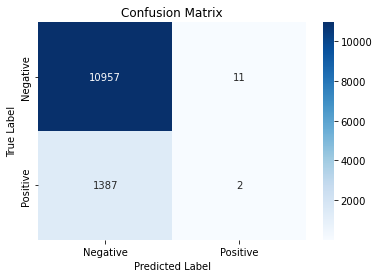

In [130]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
base_predictions = [list(dtree_main.predict(X_scaled)),
                    list(boost.predict(X_scaled)),
                    list(bagging.predict(X_scaled))]

In [133]:
base_predictions = np.array(base_predictions).transpose()

In [134]:
super_learner = LogisticRegression()

In [135]:
len(X_test)

12357

In [136]:
len(base_predictions)

51160

In [137]:
super_learner.fit(base_predictions, y_train)

LogisticRegression()

In [139]:
super_learner.coef_

array([[0.71919684, 3.70851727, 1.87662852]])

According to the above results, the boosted model outperforms other models since the coefficient result 3.708 is the higher result